# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud





## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
#Reading dataset

df = pd.read_csv('20220327 annual-number-of-deaths-by-cause.csv')

In [3]:
# Get the shape of the DataFrame and assign it to two variables
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 8254
Number of columns: 36


In [4]:
df.head(10)


,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
5,Afghanistan,AFG,2013,2,2281.0,18015.0,460.0,143.0,1777.0,4379.0,...,1651.0,3709.0,55274.0,4945.0,6859.0,3413.0,6476.0,2204.0,1581.0,491.0
6,Afghanistan,AFG,2014,6,1935.0,18462.0,463.0,228.0,1757.0,4420.0,...,1579.0,5414.0,55932.0,5055.0,6851.0,3454.0,6522.0,2134.0,1620.0,502.0
7,Afghanistan,AFG,2015,1,1821.0,18876.0,463.0,284.0,1730.0,5039.0,...,1469.0,6216.0,56875.0,5153.0,6835.0,3492.0,6555.0,2065.0,1652.0,511.0
8,Afghanistan,AFG,2016,6,1795.0,19459.0,471.0,388.0,1742.0,5033.0,...,1416.0,6142.0,57970.0,5296.0,6894.0,3578.0,6673.0,2044.0,1690.0,524.0
9,Afghanistan,AFG,1990,NaN,2159.0,11580.0,323.0,93.0,1370.0,1538.0,...,2054.0,12.0,44899.0,3709.0,5945.0,2673.0,5005.0,2985.0,1116.0,371.0


In [8]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Number of executions (Amnesty International)',
       'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Bo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    8254 non-null   object 
 1   Code                                                                                      6206 non-null   object 
 2   Year                                                                                      8254 non-null   int64  
 3   Number of executions (Amnesty International)                                              267 non-null    object 
 4   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  8010 non-null   float64
 5   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

In [6]:
#Datatype of each column
df.dtypes

Entity                                                                                       object
Code                                                                                         object
Year                                                                                          int64
Number of executions (Amnesty International)                                                 object
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    float64
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     float64
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                float64
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       float64
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      float64
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                        float64


In [8]:
#checking for null values in the dataframe
df.isna().sum()

Entity                                                                                         0
Code                                                                                        2048
Year                                                                                           0
Number of executions (Amnesty International)                                                7987
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                     244
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                      244
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                 244
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                        244
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                       244
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                         244
Deaths - HIV/AIDS - Sex: Both 

In [9]:
#Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print('numeric cols',numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print('non numeric',non_numeric_cols)

numeric cols Index(['Year', 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alcohol use disorder

In [10]:
#number of unique entries
df.nunique( )

Entity                                                                                       293
Code                                                                                         217
Year                                                                                          30
Number of executions (Amnesty International)                                                  81
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    3443
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     6615
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                2893
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       2708
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      3408
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                        3723
Deaths - HIV/AIDS - Sex: Both 

In [12]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Entity                                        8254 non-null   object
 1   Code                                          6206 non-null   object
 2   Number of executions (Amnesty International)  267 non-null    object
dtypes: object(3)
memory usage: 193.6+ KB


In [13]:
#Any duplicates
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [14]:
#Distribution of Numeric columns

missing_ratio = df.select_dtypes(include=['float64','int64']).isnull().sum()
missing_ratio = missing_ratio / num_rows
columns=list(missing_ratio.index)
values=list(missing_ratio.values)
missing_ratio_df={columns[i]:values[i] for i in range(len(columns))}
missing_ratio_df['']=['missing_ratio']
missing_ratio_df=pd.DataFrame(missing_ratio_df).set_index('')

missing_ratio_df

,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
,,,,,,,,,,,,,,,,,,,,,
missing_ratio,0.0,0.029561,0.029561,0.029561,0.029561,0.029561,0.029561,0.029561,0.029561,0.029561,...,0.029561,0.649746,0.029561,0.029561,0.029561,0.029561,0.029561,0.029561,0.029561,0.029561


In [15]:
numeric_info_df=df.describe()

numeric_info_df

,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
count,8254.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8.010000e+03,...,8010.000000,2891.000000,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,2004.448025,12909.701124,2.983985e+05,4444.838077,31812.044569,12532.637953,15315.848315,4.725143e+04,3469.958926,5.605527e+04,...,14441.384519,349.235905,5.672777e+05,3.614545e+04,1.315012e+05,4.668634e+04,8.261491e+04,4586.226592,3.923395e+04,9367.016979
std,8.642230,41799.388071,8.643901e+05,12111.913749,123035.872293,40095.990735,42888.544878,1.744798e+05,11186.514866,1.837876e+05,...,47987.721059,1917.143788,1.606918e+06,1.028788e+05,4.174924e+05,1.282383e+05,2.253554e+05,16692.425941,1.179772e+05,27358.717966
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1997.000000,29.000000,1.934250e+03,35.000000,0.000000,58.000000,76.250000,2.600000e+01,7.000000,6.200000e+01,...,10.000000,0.000000,4.348500e+03,2.810000e+02,5.262500e+02,3.040000e+02,5.990000e+02,3.000000,2.010000e+02,55.000000
50%,2004.000000,294.000000,1.033850e+04,244.000000,1.000000,393.500000,494.000000,4.200000e+02,57.000000,9.560000e+02,...,233.500000,5.000000,2.326550e+04,1.651000e+03,2.960500e+03,2.134000e+03,4.032500e+03,47.000000,1.337000e+03,331.000000
75%,2012.000000,3187.750000,9.186925e+04,1470.750000,2462.000000,3017.750000,4372.500000,9.484500e+03,518.750000,1.037775e+04,...,4245.000000,60.000000,1.663318e+05,1.192175e+04,2.815650e+04,1.680225e+04,2.838875e+04,453.750000,1.186775e+04,2954.000000
max,2019.000000,432524.000000,1.007964e+07,129705.000000,961129.000000,460665.000000,463129.000000,1.844490e+06,128083.000000,1.808478e+06,...,656314.000000,44490.000000,1.856251e+07,1.427232e+06,3.974315e+06,1.472012e+06,2.557689e+06,166405.000000,1.623276e+06,362907.000000


In [16]:
numeric_info_df=pd.concat([missing_ratio_df,numeric_info_df],axis=0)

numeric_info_df

,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
missing_ratio,0.000000,0.029561,2.956142e-02,0.029561,0.029561,0.029561,0.029561,2.956142e-02,0.029561,2.956142e-02,...,0.029561,0.649746,2.956142e-02,2.956142e-02,2.956142e-02,2.956142e-02,2.956142e-02,0.029561,2.956142e-02,0.029561
count,8254.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8.010000e+03,...,8010.000000,2891.000000,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,2004.448025,12909.701124,2.983985e+05,4444.838077,31812.044569,12532.637953,15315.848315,4.725143e+04,3469.958926,5.605527e+04,...,14441.384519,349.235905,5.672777e+05,3.614545e+04,1.315012e+05,4.668634e+04,8.261491e+04,4586.226592,3.923395e+04,9367.016979
std,8.642230,41799.388071,8.643901e+05,12111.913749,123035.872293,40095.990735,42888.544878,1.744798e+05,11186.514866,1.837876e+05,...,47987.721059,1917.143788,1.606918e+06,1.028788e+05,4.174924e+05,1.282383e+05,2.253554e+05,16692.425941,1.179772e+05,27358.717966
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1997.000000,29.000000,1.934250e+03,35.000000,0.000000,58.000000,76.250000,2.600000e+01,7.000000,6.200000e+01,...,10.000000,0.000000,4.348500e+03,2.810000e+02,5.262500e+02,3.040000e+02,5.990000e+02,3.000000,2.010000e+02,55.000000
50%,2004.000000,294.000000,1.033850e+04,244.000000,1.000000,393.500000,494.000000,4.200000e+02,57.000000,9.560000e+02,...,233.500000,5.000000,2.326550e+04,1.651000e+03,2.960500e+03,2.134000e+03,4.032500e+03,47.000000,1.337000e+03,331.000000
75%,2012.000000,3187.750000,9.186925e+04,1470.750000,2462.000000,3017.750000,4372.500000,9.484500e+03,518.750000,1.037775e+04,...,4245.000000,60.000000,1.663318e+05,1.192175e+04,2.815650e+04,1.680225e+04,2.838875e+04,453.750000,1.186775e+04,2954.000000
max,2019.000000,432524.000000,1.007964e+07,129705.000000,961129.000000,460665.000000,463129.000000,1.844490e+06,128083.000000,1.808478e+06,...,656314.000000,44490.000000,1.856251e+07,1.427232e+06,3.974315e+06,1.472012e+06,2.557689e+06,166405.000000,1.623276e+06,362907.000000


In [15]:
df.corr()

C:\Users\tejas\AppData\Local\Temp\ipykernel_1492\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
Year,1.000000,-0.050841,0.052942,-0.018506,-0.018230,-0.066955,-0.003429,0.023205,0.053754,-0.040415,...,-0.110534,0.114572,0.039028,0.091783,0.016870,0.036992,0.031980,-0.060551,0.102628,0.091602
Deaths - Meningitis - Sex: Both - Age: All Ages (Number),-0.050841,1.000000,0.511549,0.829391,0.921133,0.730678,0.700984,0.841126,0.410733,0.925159,...,0.929291,0.562713,0.587416,0.646428,0.644196,0.749281,0.739988,0.852658,0.426672,0.497619
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),0.052942,0.511549,1.000000,0.847902,0.307912,0.810571,0.817788,0.397068,0.878616,0.631949,...,0.514078,0.639932,0.980437,0.943427,0.914287,0.916551,0.930671,0.599304,0.969322,0.987947
"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",-0.018506,0.829391,0.847902,1.000000,0.624106,0.915178,0.908018,0.643968,0.727650,0.901994,...,0.796166,0.611540,0.913855,0.896203,0.902072,0.964510,0.964846,0.868946,0.760915,0.827274
Deaths - Malaria - Sex: Both - Age: All Ages (Number),-0.018230,0.921133,0.307912,0.624106,1.000000,0.456523,0.520445,0.908880,0.226404,0.725273,...,0.797792,0.574403,0.370002,0.444613,0.382496,0.532062,0.518373,0.601933,0.261504,0.307359
Deaths - Drowning - Sex: Both - Age: All Ages (Number),-0.066955,0.730678,0.810571,0.915178,0.456523,1.000000,0.825961,0.465082,0.698107,0.873811,...,0.774905,0.506914,0.859381,0.828715,0.946131,0.904361,0.906444,0.880063,0.676810,0.757202
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),-0.003429,0.700984,0.817788,0.908018,0.520445,0.825961,1.000000,0.588456,0.746931,0.754139,...,0.689295,0.622988,0.861183,0.869942,0.824710,0.893074,0.895831,0.709077,0.748705,0.797374
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),0.023205,0.841126,0.397068,0.643968,0.908880,0.465082,0.588456,1.000000,0.301911,0.689249,...,0.705750,0.548728,0.449294,0.520565,0.443422,0.582372,0.566928,0.558291,0.354488,0.398588
Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),0.053754,0.410733,0.878616,0.727650,0.226404,0.698107,0.746931,0.301911,1.000000,0.508470,...,0.441563,0.590174,0.831172,0.829285,0.780630,0.781825,0.805909,0.494224,0.885777,0.885152
Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),-0.040415,0.925159,0.631949,0.901994,0.725273,0.873811,0.754139,0.689249,0.508470,1.000000,...,0.901222,0.556783,0.713945,0.765534,0.810297,0.862344,0.855313,0.974611,0.530274,0.618233


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: >

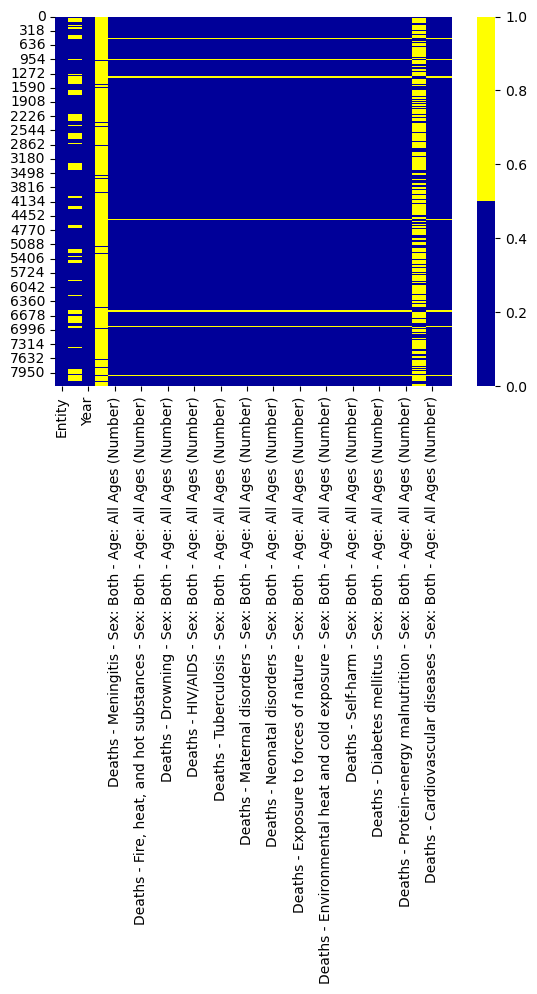

In [17]:
# Plot a heatmap of any missing data
# Create a wider heatmap
cols= df.columns[:30]
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [19]:
deaths_byDisease =       df[["Entity","Year",
                         "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Malaria - Sex: Both - Age: All Ages (Number)",
                         "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Drowning - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)",
                         "Terrorism (deaths)"]]


In [20]:
groupbyyear = deaths_byDisease.groupby(['Year'])[[
                         "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Malaria - Sex: Both - Age: All Ages (Number)",
                         "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Drowning - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)",
                         "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)",
                         "Terrorism (deaths)"]].sum().reset_index()





In [23]:
groupbyyear.head(10)

,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),...,Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Terrorism (deaths)
0,1990,4228905.0,60398479.0,8408246.0,3488024.0,17356744.0,2920539.0,32785604.0,28929778.0,28355468.0,...,11027954.0,418437.0,551551.0,3627585.0,576353.0,1182375.0,7545046.0,1069366.0,863784.0,21444.0
1,1991,4195456.0,61575255.0,8598193.0,4456222.0,17461556.0,2881332.0,32464492.0,28649550.0,28461976.0,...,11065206.0,1415519.0,566966.0,3729142.0,635454.0,1243200.0,7681183.0,793551.0,862045.0,25287.0
2,1992,4174168.0,62864296.0,8590144.0,5571433.0,17674894.0,2889659.0,32251001.0,28412056.0,28159883.0,...,11139509.0,114076.0,599655.0,3953937.0,686064.0,1334747.0,7854268.0,579583.0,867547.0,29226.0
3,1993,4118829.0,64594642.0,8656775.0,6841321.0,17338616.0,2830872.0,31974430.0,28164872.0,27432388.0,...,11241016.0,203190.0,668640.0,4199189.0,734948.0,1456631.0,8064378.0,572100.0,882970.0,0.0
4,1994,4049153.0,65891550.0,8598189.0,8229313.0,17131699.0,2826166.0,31607981.0,27902485.0,26870207.0,...,11393249.0,120891.0,723031.0,4290813.0,787544.0,1556343.0,8317748.0,6106017.0,891329.0,23070.0
5,1995,4009235.0,66987451.0,8671648.0,9647935.0,16985978.0,2799470.0,31267208.0,27686513.0,26215746.0,...,11475954.0,189641.0,726320.0,4302447.0,821289.0,1584563.0,8396008.0,634903.0,885363.0,18309.0
6,1996,4094679.0,67874956.0,8776488.0,10906163.0,16818376.0,2773391.0,30732673.0,27380994.0,25668185.0,...,11467127.0,143567.0,675483.0,4181413.0,839806.0,1580931.0,8333429.0,806253.0,870362.0,20898.0
7,1997,3925398.0,68856955.0,8987385.0,12059556.0,16886724.0,2793821.0,30336134.0,27163133.0,25331018.0,...,11542682.0,164412.0,638455.0,4129435.0,850416.0,1572157.0,8361201.0,915716.0,855996.0,32772.0
8,1998,3854071.0,70068112.0,9072169.0,13417308.0,16881960.0,2795215.0,29889059.0,26946320.0,25006655.0,...,11622590.0,424906.0,649629.0,4170446.0,877512.0,1581179.0,8434329.0,1000240.0,849394.0,14064.0
9,1999,3822257.0,71643138.0,9006828.0,14856094.0,16839850.0,2793565.0,29426226.0,26695400.0,24553653.0,...,11791297.0,629329.0,634589.0,4252746.0,902412.0,1624600.0,8540985.0,1303928.0,855738.0,10179.0


In [24]:
groupbyyear.columns

Index(['Year', 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Digestive disea

In [25]:
diseases = [
    'Meningitis', 'Neoplasms', 'Malaria', 'HIV/AIDS',
    'Tuberculosis', 'Maternal disorders', 'Lower respiratory infections', 'Neonatal disorders',
    'Diarrheal diseases', 'Nutritional deficiencies', 'Diabetes mellitus', 'Protein-energy malnutrition',
    'Cardiovascular diseases', 'Digestive diseases', 'Acute hepatitis', "Alzheimer's disease",
    "Parkinson's disease", "Fire, heat, and hot substances", "Drowning", "Road injuries",
    "Exposure to forces of nature", "Environmental heat and cold exposure", "Interpersonal violence",
    "Drug use disorders", "Alcohol use disorders", "Self-harm", "Conflict and terrorism", "Poisonings", "Terrorism"
]


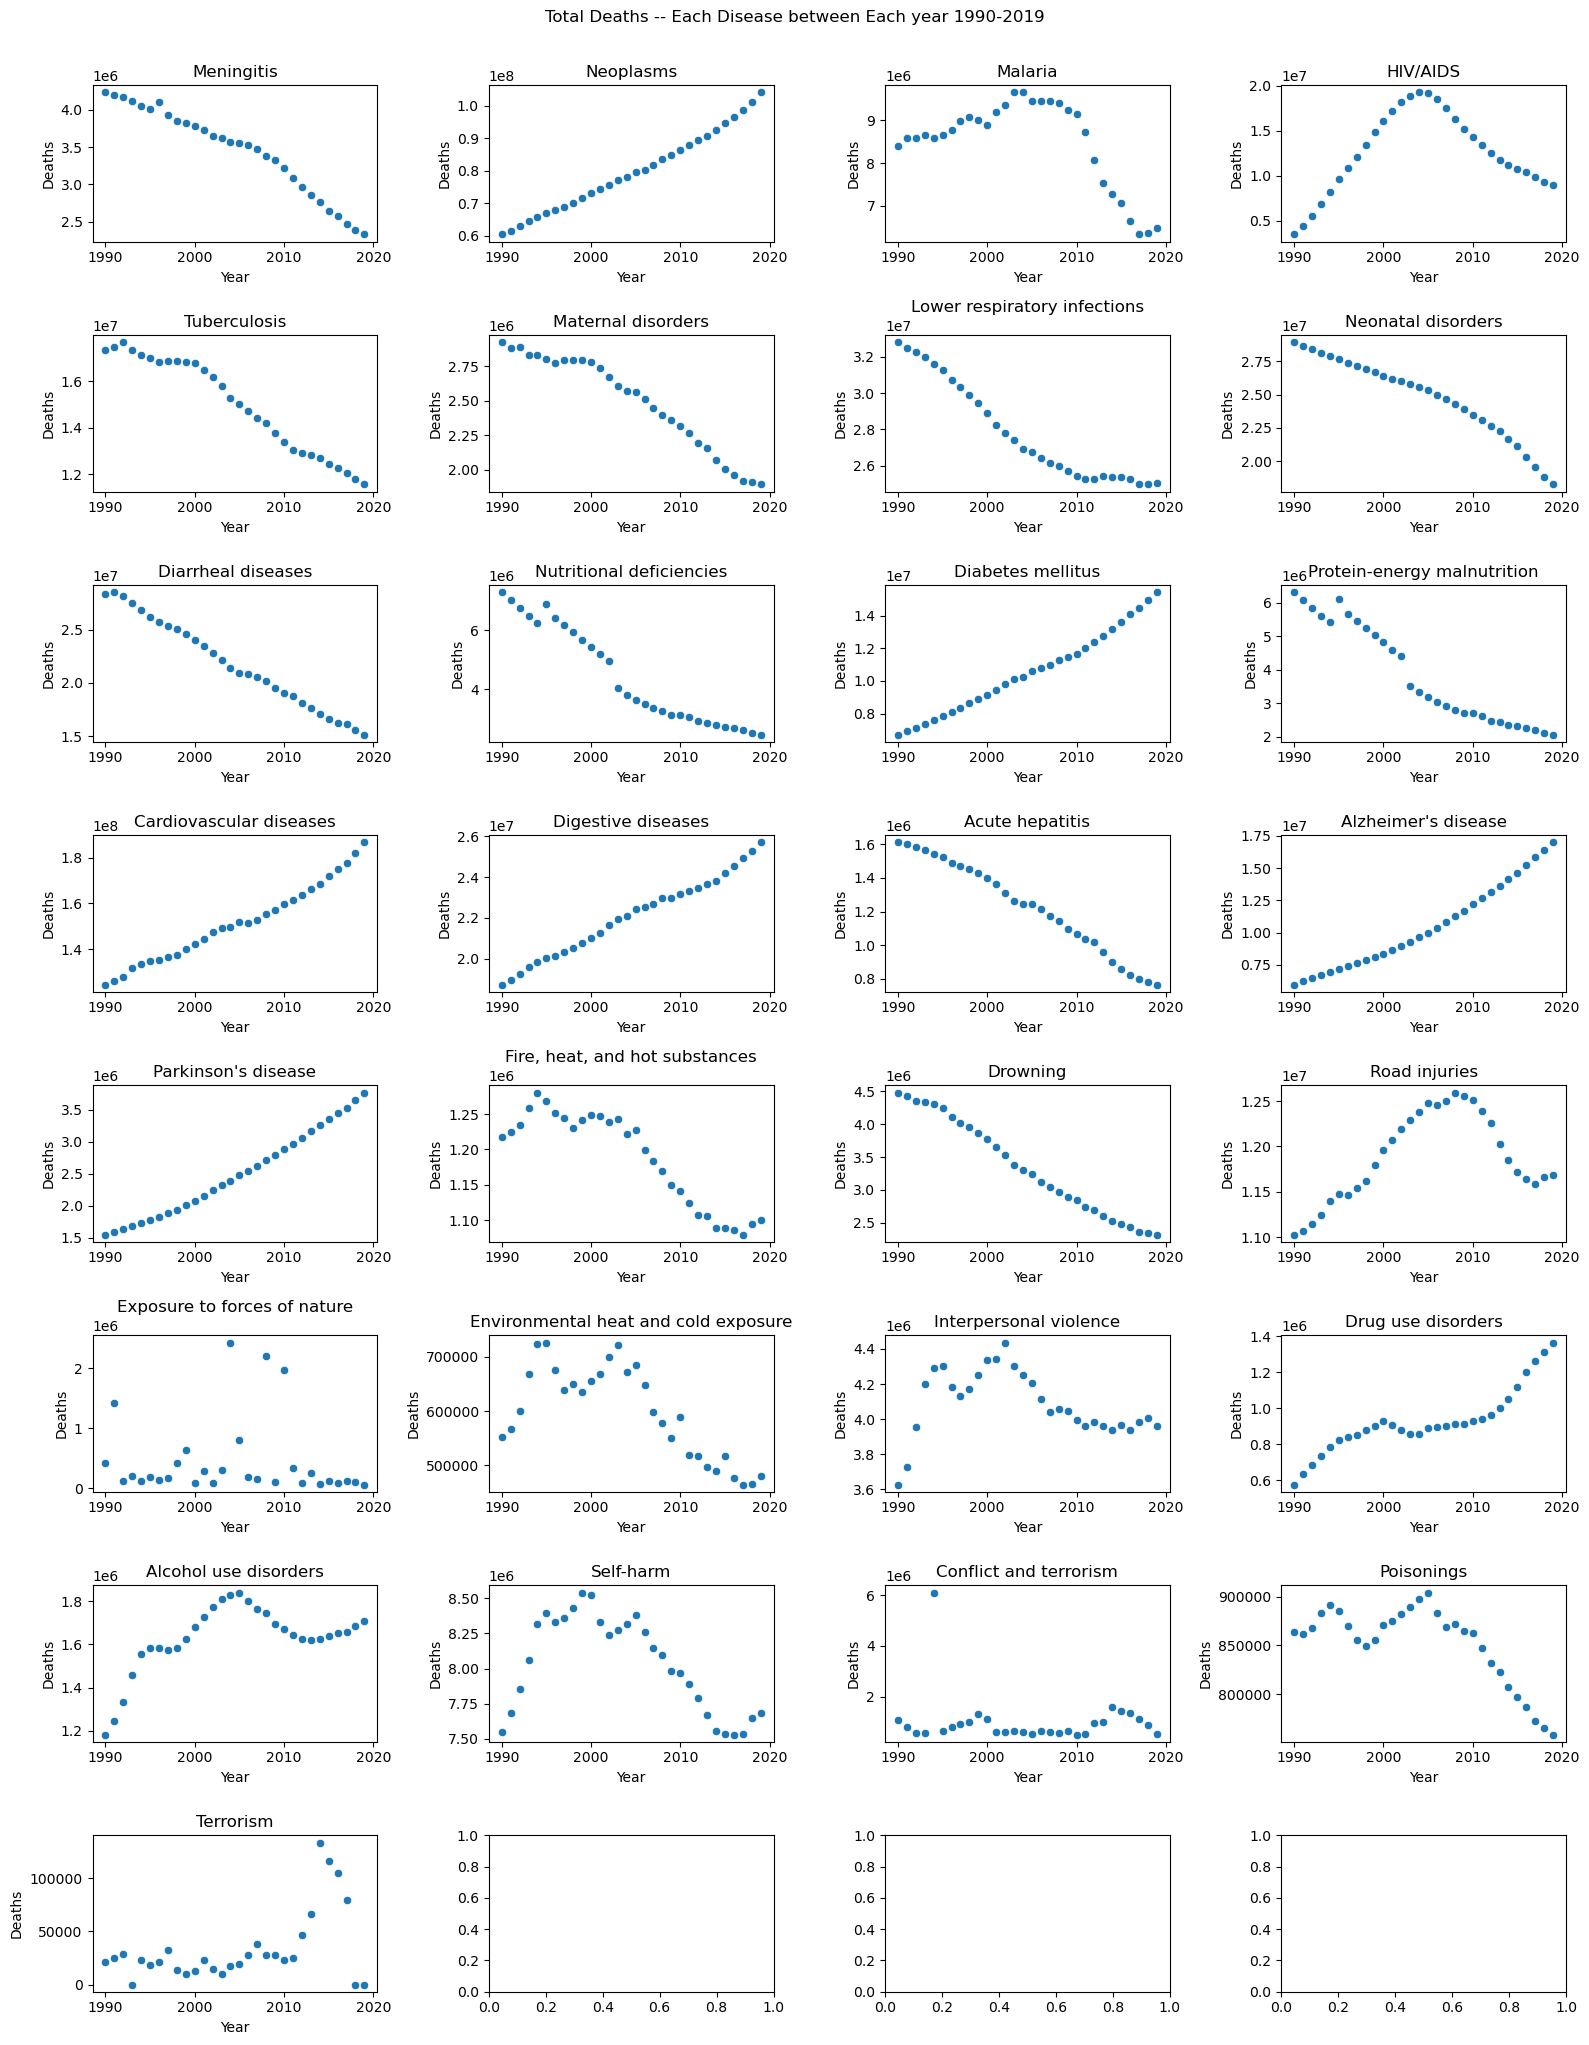

In [32]:
# Create a subplot with 10 rows and 4 columns
fig, axes = plt.subplots(8, 4, figsize=(16, 20))

# Loop through diseases and plot scatter for each one
for i, disease in enumerate(diseases):
    row, col = divmod(i, 4)  # Calculate row and column for subplot
    
    # Check if the disease is present in the column names
    matching_columns = groupbyyear.columns[groupbyyear.columns.str.contains(disease)]
  
   
    
    if len(matching_columns) > 0:
        col_name = matching_columns.values[0]
        sns.scatterplot(x='Year', y=col_name, data=groupbyyear, ax=axes[row, col])
        axes[row, col].set_title(disease)
        axes[row, col].set_xlabel('Year')
        axes[row, col].set_ylabel('Deaths')
   

# Adjust layout
plt.tight_layout()

# Set the title for the entire figure
plt.suptitle("Total Deaths -- Each Disease between Each year 1990-2019", y=1.02)

# Show the plot
plt.show()


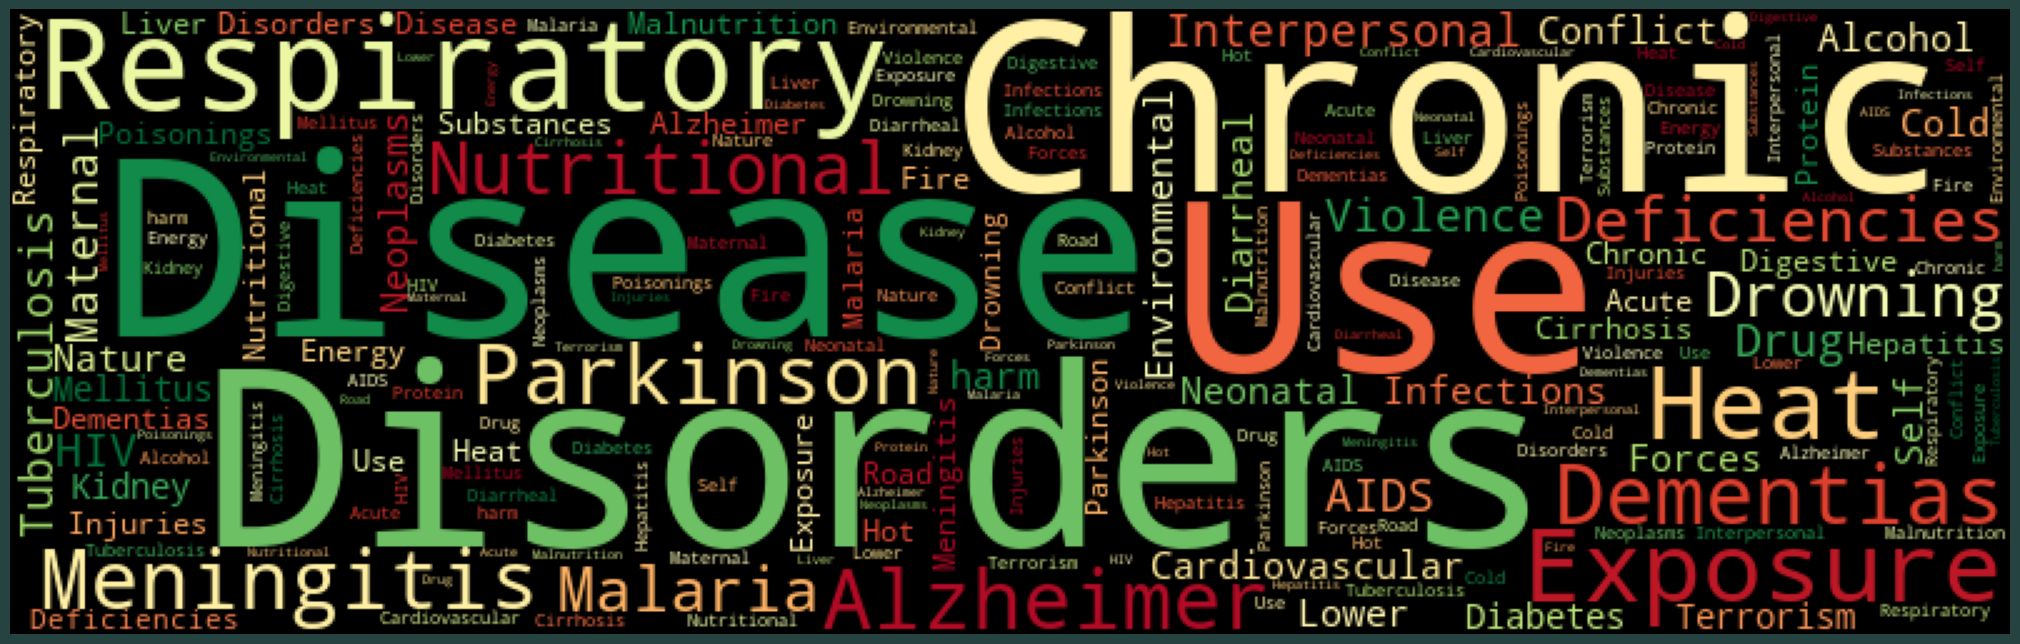

In [34]:
text= "Meningitis Alzheimer's Disease and Other Dementias Parkinson's Disease Nutritional Deficiencies Malaria Drowning Interpersonal Violence Maternal Disorders HIV/AIDS Drug Use Disorders Tuberculosis Cardiovascular Diseases Lower Respiratory Infections Neonatal Disorders Alcohol Use Disorders Self-harm Exposure to Forces of Nature Diarrheal Diseases Environmental Heat and Cold Exposure Neoplasms Conflict and Terrorism Diabetes Mellitus Chronic Kidney Disease Poisonings Protein-Energy Malnutrition Road Injuries Chronic Respiratory Diseases Cirrhosis and Other Chronic Liver Diseases Digestive Diseases Fire Heat and Hot Substances Acute Hepatitis"

wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()


In [26]:
print(f'\n There are {len(df["Entity"].unique())} country/territory enlisted here.\n')
countries_unique = np.unique(df['Entity'])
countries_unique = pd.DataFrame(countries_unique , columns = ['Entity'])
countries_unique.T.style.set_properties(**{"border": "1.5px solid black"})


 There are 293 country/territory enlisted here.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292
Entity,Afghanistan,Africa,African Region,African Union,Albania,Algeria,America,American Samoa,Andean Latin America,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,Australasia,Australasia & Oceania,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Caribbean,Central African Republic,Central America & Caribbean,Central Asia,Central Europe,"Central Europe, Eastern Europe, and Central Asia",Central Latin America,Central sub-Saharan Africa,Chad,Chile,China,Colombia,Commonwealth,Commonwealth High Income,Commonwealth Low Income,Commonwealth Middle Income,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Czechoslovakia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Asia,East Asia & Pacific - World Bank region,East Germany (GDR),East Timor,Eastern Europe,Eastern Mediterranean Region,Eastern sub-Saharan Africa,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Europe,Europe & Central Asia - World Bank region,European Region,European Union,Fiji,Finland,France,French Guiana,French Polynesia,G20,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,High SDI,High-income,High-income Asia Pacific,High-income North America,High-middle SDI,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latin America & Caribbean - World Bank region,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Low SDI,Low-middle SDI,Luxembourg,Macau,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mexico,Micronesia (country),Middle East & North Africa,Middle SDI,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Nordic Region,North Africa and Middle East,North America,North Korea,North Macedonia,Northern Ireland,Northern Mariana Islands,Norway,OECD Countries,Oceania,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Region of the Americas,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Scotland,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South America,South Asia,South Asia - World Bank region,South Korea,South Sudan,South-East Asia Region,Southeast Asia,"Southeast Asia, East Asia, and Oceania",Southern Latin America,Southern sub-Saharan Africa,Spain,Sri Lanka,Sub-Saharan Africa

In [32]:

print(f'\n There are {len(df["Code"].unique())} country/territory enlisted here.\n')
df['Code'] = df['Code'].astype(str)
codes_unique = np.unique(df['Code'])
codes_unique = pd.DataFrame(codes_unique , columns = ['Code'])
codes_unique.T.style.set_properties(**{"border": "1.5px solid black"})


 There are 218 country/territory enlisted here.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217
Code,AFG,AGO,ALB,AND,ARE,ARG,ARM,ASM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CHE,CHL,CHN,CIV,CMR,COD,COG,COK,COL,COM,CPV,CRI,CUB,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,ECU,EGY,ERI,ESH,ESP,EST,ETH,FIN,FJI,FRA,FSM,GAB,GBR,GEO,GHA,GIN,GLP,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUF,GUM,GUY,HKG,HND,HRV,HTI,HUN,IDN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JOR,JPN,KAZ,KEN,KGZ,KHM,KIR,KNA,KOR,KWT,LAO,LBN,LBR,LBY,LCA,LKA,LSO,LTU,LUX,LVA,MAR,MCO,MDA,MDG,MDV,MEX,MHL,MKD,MLI,MLT,MMR,MNE,MNG,MNP,MOZ,MRT,MTQ,MUS,MWI,MYS,NAM,NCL,NER,NGA,NIC,NIU,NLD,NOR,NPL,NRU,NZL,OMN,OWID_CZS,OWID_KOS,OWID_USS,OWID_WRL,OWID_YGS,PAK,PAN,PER,PHL,PLW,PNG,POL,PRI,PRK,PRT,PRY,PSE,PYF,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLB,SLE,SLV,SMR,SOM,SRB,SSD,STP,SUR,SVK,SVN,SWE,SWZ,SYC,SYR,TCD,TGO,THA,TJK,TKL,TKM,TLS,TON,TTO,TUN,TUR,TUV,TWN,TZA,UGA,UKR,URY,USA,UZB,VCT,VEN,VIR,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE,nan


In [46]:
df['Year'].unique()

array([2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2010, 2017, 2018, 2019], dtype=int64)

C:\Users\tejas\AppData\Local\Temp\ipykernel_26476\1711881609.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\tejas\AppData\Local\Temp\ipykernel_26476\1711881609.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



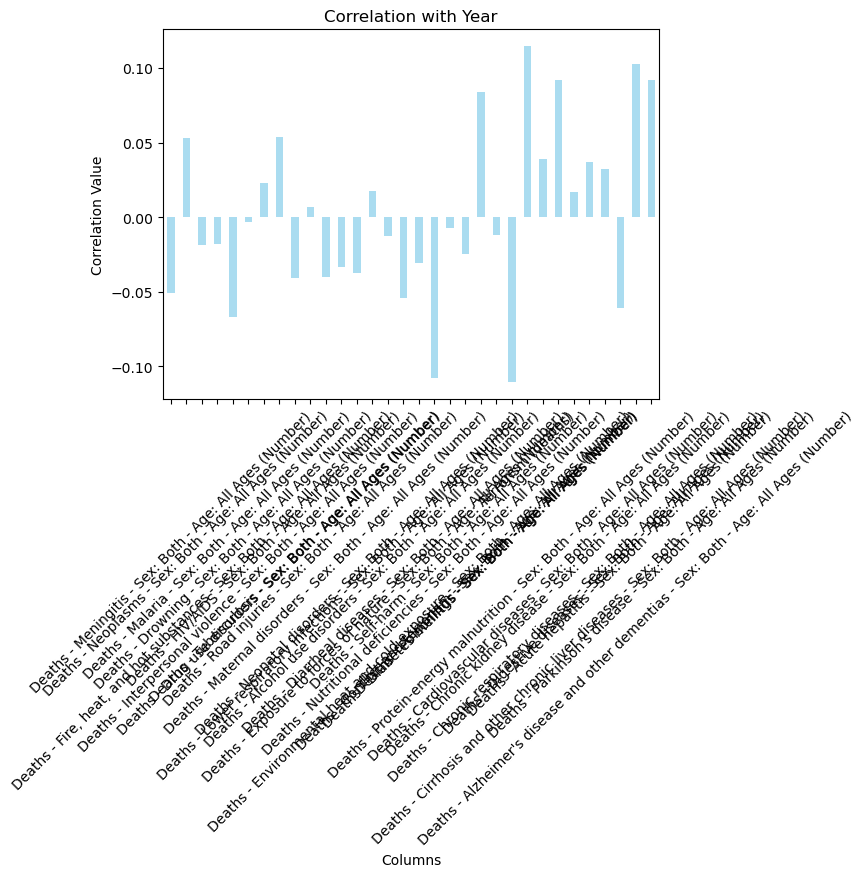

In [28]:
# Correlation of various causes of death against year

correlation = df.corr()['Year']

# Create a bar plot
correlation.drop('Year').plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Correlation with Year')
plt.xlabel('Columns')
plt.ylabel('Correlation Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

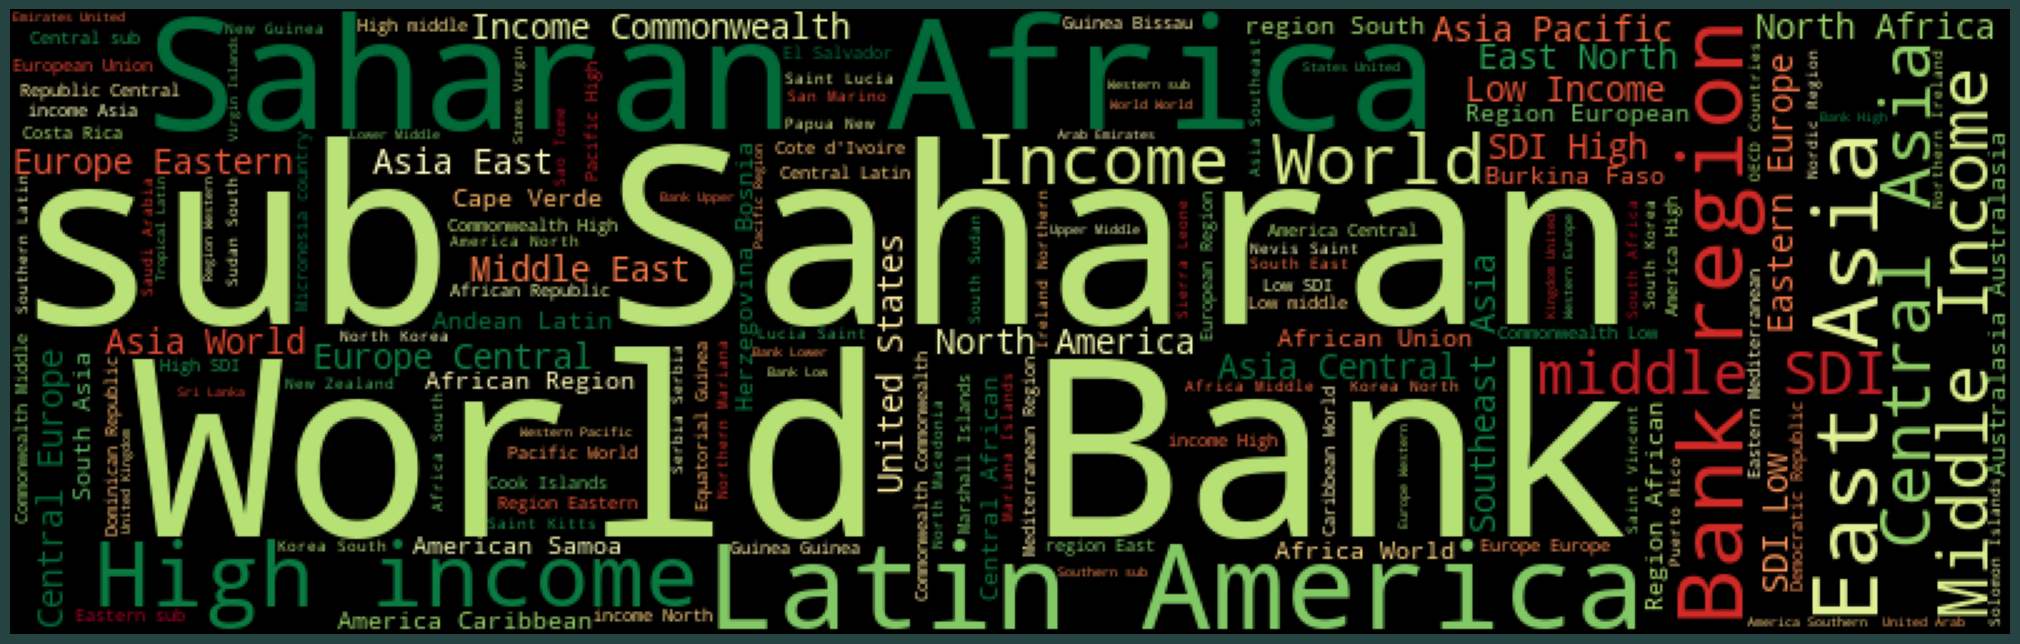

In [33]:
text = " ".join(subject_titles for subject_titles in df["Entity"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

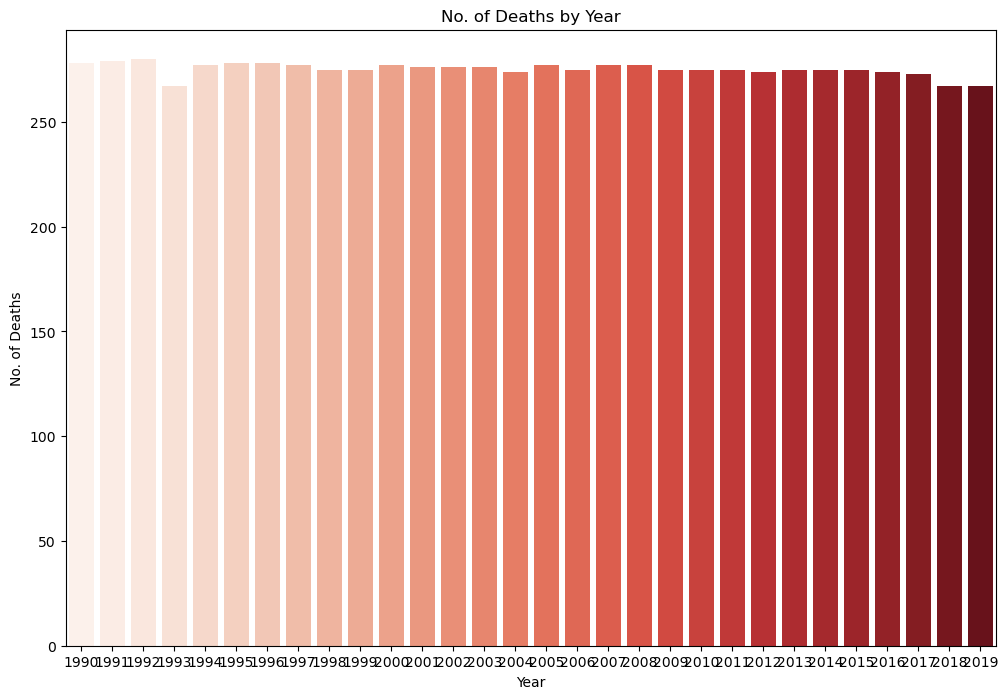

In [9]:
#No.of deaths by year
# Create the bar plot using Seaborn
# Calculate the count of deaths by year
year_counts = df['Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Count', data=year_counts, palette='Reds')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('No. of Deaths')
plt.title('No. of Deaths by Year')

# Show the plot
plt.show()


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
In the above dataset, in the entity column, I could observe the raw file have some country agrupations by region, but there is no data indicating it's an aggregation.
2. Do you have any concerns about your dataset? 
NO.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
According to the above EDA process, I might delete some entities from entity column that are not at country level,In order to be more accurate, I begin to analyze countries using the ISO Country code